In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

path = '/media/robert/Data_Storage/Data/Experimental/Stark_Broadening/6-5-19_Spectrometer/'

In [2]:
dataset = '1906050014'
spectrum = np.load(path+dataset+'/michaelito_'+dataset+'_0000.npy').item()
l = spectrum['lambda']
N = len(l)

In [3]:
def integrate_dataset(dataset):
    file = path + str(dataset) + '/michaelito_' + str(dataset) + '_'
    I = np.zeros(N, dtype='double')
    for i in range(100):
        filename = file + '%04d.npy' % i
        I += np.load(filename).item()['I']
    return I

In [4]:
def plot_spectrum(*args, xlim=None, ylim=None, lines=None, title=None):
    if xlim is None:
        xlim = (l[0], l[-1])
    plt.figure(figsize=(8, 2), dpi=150)
    ax = plt.subplot()
    peak = 0
    colors = [plt.cm.brg(i) for i in np.linspace(0, 1, len(args))]
    ax.set_prop_cycle('color', colors)
    for arg in args:
        plt.plot(l, arg, linewidth=0.2)
        amax = np.amax(arg)
        if amax > peak:
            peak = amax
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('Counts')
    plt.xlim(xlim)
    if ylim is None:
        ylim = (-1000, 1.05*peak)
    plt.ylim(ylim)
    if lines is not None:
        for i in range(len(lines)):
            line = lines[i]
            plt.plot([line, line], [ylim[0], ylim[1]], 'k--', linewidth=0.2)
    if title is not None:
        plt.title(title)
    plt.show()

In [5]:
def adjust(data, background, start, end):
    data_adjusted = data - background
    data_adjusted -= np.average(data_adjusted[start:end])
    return data_adjusted

In [24]:
# Helium lines with intensity greater than 100
lines = np.array([3888.6456, 3888.6489, 4471.479, 4921.931, 5015.678, 5875.6148, 5875.6404, 5875.9663, 6678.1517,
                  7065.1771, 10829.0911, 10830.2501, 10830.3398])
lines = lines/10
# Singly ionized Helium lines
lines2 = np.array([4685.7038, 4685.7044, 6560.10])
lines2 = lines2/10

lines_c = np.append(lines, lines2)

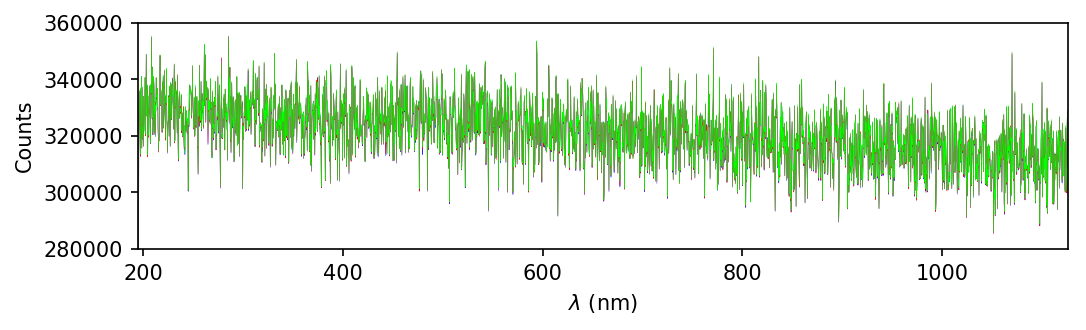

In [18]:
background0 = integrate_dataset(1906050011)
background1 = integrate_dataset(1906050014)
background2 = integrate_dataset(1906050020)
background = (background1+background2)/2
plot_spectrum(background0, background1, background2, ylim=(280000, 360000))

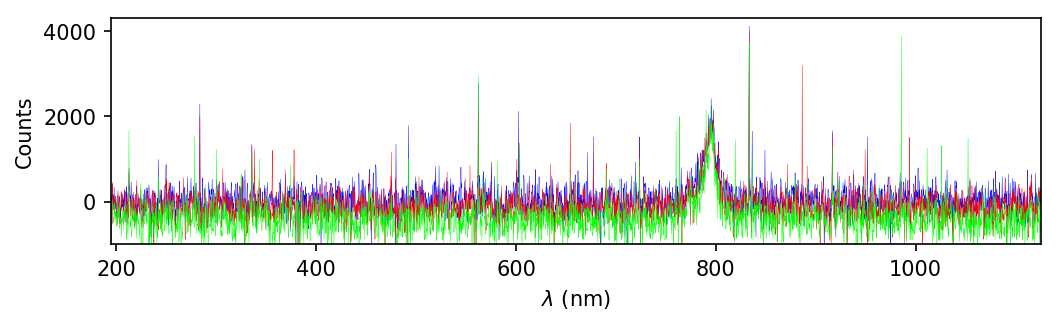

In [19]:
# Strange 1e15 dataset before removing beam block and retaking background
set1 = integrate_dataset(1906050012)
plot_spectrum(set1-background0, set1-background1, set1-background2)
# I think the conclusion might be that the signal was a bit too small

In [22]:
densities = np.array([1.25e15, 2.5e15, 7.5e15, 1e16, 2.5e16, 5e16, 7.5e16, 1e17, 1.5e17, 2.5e17, 5e17])
intensity = np.zeros((len(densities), N))
intensity[0] = adjust(integrate_dataset(1906050015), background, 0, 800)
intensity[1] = adjust(integrate_dataset(1906050016), background, 0, 800)
intensity[2] = adjust(integrate_dataset(1906050017), background, 0, 800)
intensity[3] = adjust(integrate_dataset(1906050018), background, 0, 800)
intensity[4] = adjust(integrate_dataset(1906050019), background, 0, 800)
intensity[5] = adjust(integrate_dataset(1906050021), background, 0, 800)
intensity[6] = adjust(integrate_dataset(1906050022), background, 0, 800)
intensity[7] = adjust(integrate_dataset(1906050023), background, 0, 800)
intensity[8] = adjust(integrate_dataset(1906050024), background, 0, 800)
intensity[9] = adjust(integrate_dataset(1906050025), background, 0, 800)
intensity[10] = adjust(integrate_dataset(1906050027), background, 0, 800)

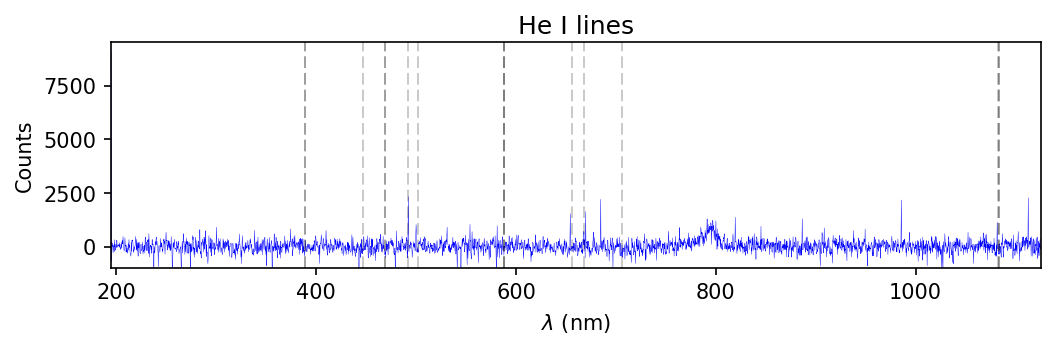

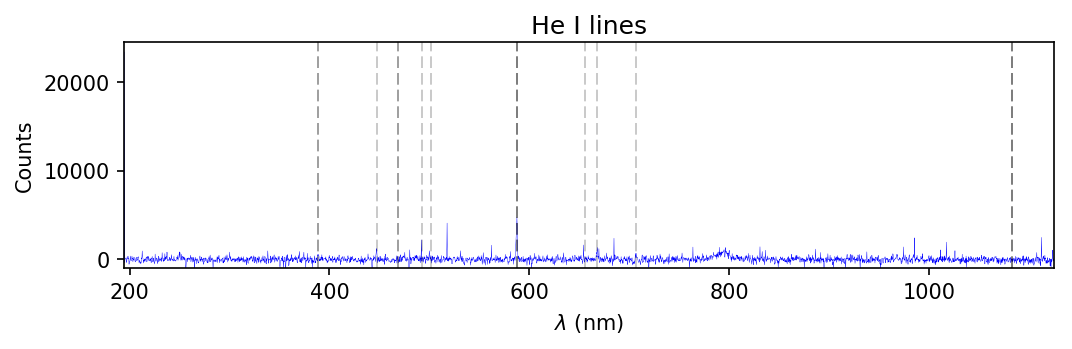

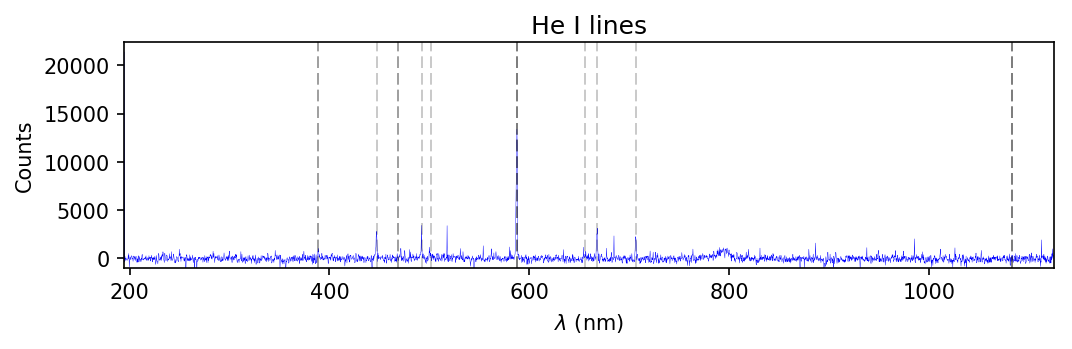

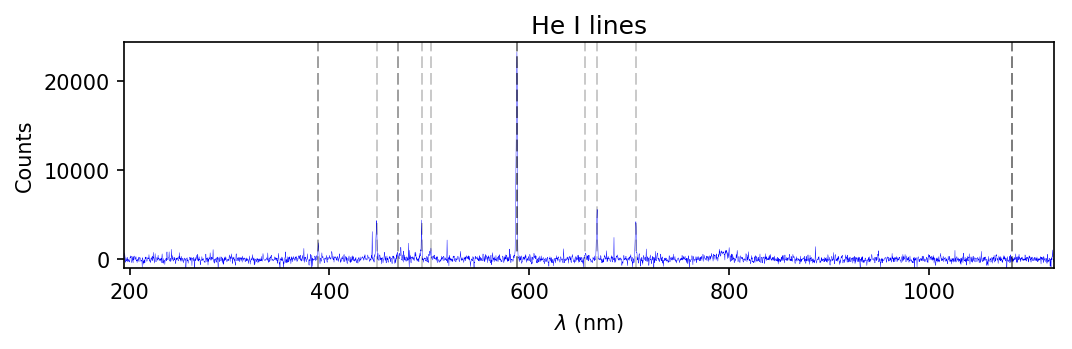

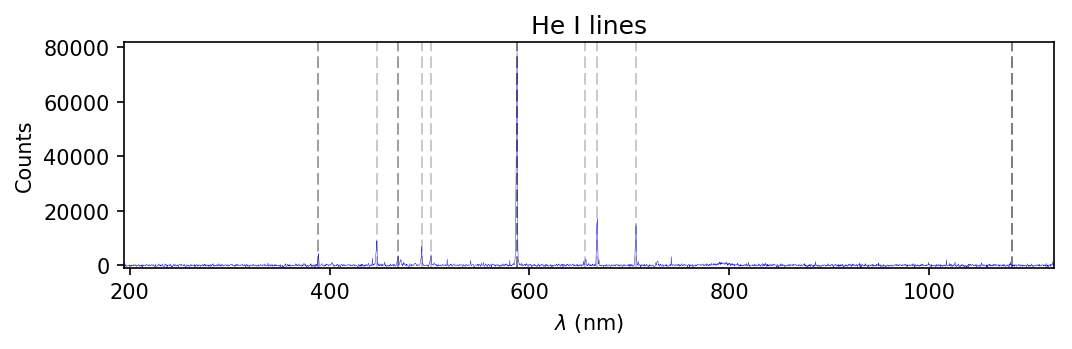

In [32]:
# Make heat map here
plot_spectrum(intensity[0], lines=lines_c, title='He I lines')
plot_spectrum(intensity[1], lines=lines_c, title='He I lines')
plot_spectrum(intensity[2], lines=lines_c, title='He I lines')
plot_spectrum(intensity[3], lines=lines_c, title='He I lines')
plot_spectrum(intensity[4], lines=lines_c, title='He I lines')